<a href="https://colab.research.google.com/github/ahmedali-97/Ahmed-mohamed-/blob/master/Copy_of_Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir("/content/drive/MyDrive/face mask detection using AI")
Dataset='Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)


['without_mask', 'with_mask']


In [3]:
#import libraries
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

img_rows, img_cols = 112, 112

images = []
labels = []

for category in Data_Dir:
    folder_path = os.path.join(Dataset, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)

        try:
          #coverting image into gray scale
          grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   
          
          #resizing the gray scale image into size 56x56 in order to keep size of images consistent
          resized_img=cv2.resize(grayscale_img,(img_rows, img_cols))
          images.append(resized_img)
          labels.append(category)
        #exception handling in case any error occurs
        except Exception as e:
          print('Exception:',e)

images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows, img_cols,1))

#perform encoding on the labels since the labels are in textual form
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_x, test_x, trian_y, test_y) = train_test_split(images, labels, test_size=0.25,random_state=0)

In [4]:
#import keras libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

#define model paramters
num_classes = 2
batch_size = 32

#build CNN model using sequential Api
model=Sequential()

#first layer group containig convolution, and Maxpooling layers
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#second layer group containig convolution, and Maxpooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flatten and Droput layer to stak the output convolution above as well as cater overfitting
model.add(Flatten())
model.add(Dropout(0.5))

#softmax classifire
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

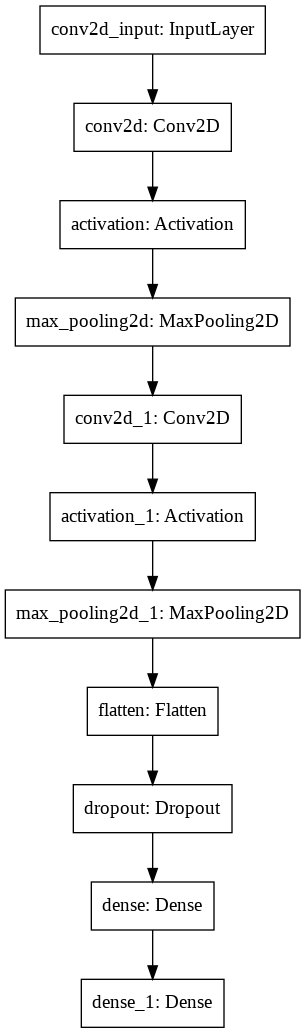

In [5]:
#Plot the model 
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='face_mask_detection_architectecture.png')

In [6]:
#train the model 
from keras.optimizers import Adam

epochs = 50

model.compile(loss= 'categorical_crossentropy', 
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy'])
              

fitted_model = model.fit(
    train_x,
    trian_y,
    epochs = epochs,
    validation_split=0.25)

Epoch 1/50
25/25 [==============================] - 8s 46ms/step - loss: 0.8382 - accuracy: 0.5098 - val_loss: 0.6407 - val_accuracy: 0.6705
Epoch 2/50
25/25 [==============================] - 1s 25ms/step - loss: 0.6111 - accuracy: 0.6580 - val_loss: 0.4167 - val_accuracy: 0.8140
Epoch 3/50
25/25 [==============================] - 1s 26ms/step - loss: 0.4077 - accuracy: 0.8111 - val_loss: 0.2786 - val_accuracy: 0.8798
Epoch 4/50
25/25 [==============================] - 1s 25ms/step - loss: 0.2658 - accuracy: 0.8863 - val_loss: 0.5472 - val_accuracy: 0.7481
Epoch 5/50
25/25 [==============================] - 1s 26ms/step - loss: 0.2702 - accuracy: 0.9017 - val_loss: 0.2226 - val_accuracy: 0.9147
Epoch 6/50
25/25 [==============================] - 1s 26ms/step - loss: 0.1346 - accuracy: 0.9549 - val_loss: 0.2338 - val_accuracy: 0.9109
Epoch 7/50
25/25 [==============================] - 1s 26ms/step - loss: 0.1231 - accuracy: 0.9629 - val_loss: 0.2402 - val_accuracy: 0.8915
Epoch 8/50
25

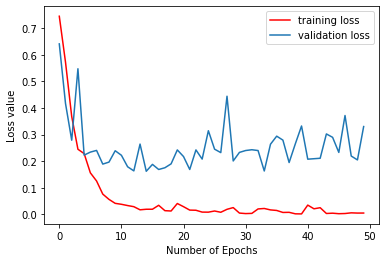

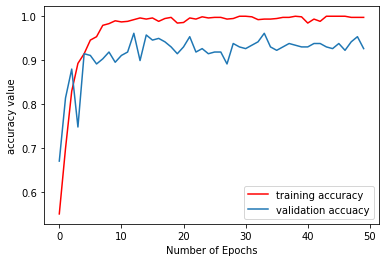

In [7]:
#plot the training loss &accuracy
from matplotlib import pyplot as plt

#plot training and validation loss
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

#plot training and validation accuracy
plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuacy')
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy value')
plt.legend()
plt.show()


In [12]:
#save the model with namw project (face mask detection using AI)
model.save("face_mask_detection.h5")
